In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [3]:
df_diamonds = pd.read_csv('data/train.csv')
df_diamonds_test = pd.read_csv('data/test.csv')
df_diamonds.sample(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
27657,27657,0.59,Premium,H,VVS1,62.0,58.0,5.38,5.36,3.33,1982
11004,11004,0.71,Very Good,F,SI2,59.0,58.0,5.84,5.89,3.46,2098
5247,5247,1.02,Very Good,E,SI2,59.6,59.0,6.54,6.59,3.91,4398


In [4]:
df_diamonds.shape

(40455, 11)

In [5]:
df_diamonds.duplicated().sum() #no duplicates

0

In [6]:
df_diamonds.count()

id         40455
carat      40455
cut        40455
color      40455
clarity    40455
depth      40455
table      40455
x          40455
y          40455
z          40455
price      40455
dtype: int64

In [7]:
df_diamonds.dtypes #transform cut, color and clarity to numbers

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [8]:
df_diamonds.isnull().sum() #database appears clean

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
Q1 = df_diamonds.drop(columns='id').quantile(.25)
Q3 = df_diamonds.drop(columns='id').quantile(.75)
IQR = Q3-Q1
print(IQR) #later, test a model without outliers / use z-score

carat       0.64
depth       1.50
table       3.00
x           1.83
y           1.82
z           1.13
price    4382.00
dtype: float64


In [10]:
#transform cut, color and clarity to numbers

In [11]:
list(df_diamonds.cut.unique()) #scale not categorical

['Ideal', 'Fair', 'Very Good', 'Premium', 'Good']

In [12]:
df_diamonds.cut.replace({
 'Ideal':4,
'Premium':3,
'Very Good':2,
'Good':1,
'Fair':0}, inplace=True)

set(df_diamonds.cut)

{0, 1, 2, 3, 4}

In [13]:
list(df_diamonds.color.unique()) #scale not categorical

['G', 'H', 'F', 'J', 'E', 'I', 'D']

In [14]:
#df_diamonds.color.replace({'D':0,
#                           'E':.5,
#                           'F':1,
#                           'G':1.5,
#                           'H':2,
#                           'I':2.5,
#                           'J':3}, inplace=True)
#set(df_diamonds.color)

In [15]:
df_diamonds.color.replace({'D':6,
                           'E':5,
                           'F':4,
                           'G':3,
                           'H':2,
                           'I':1,
                           'J':0}, inplace=True)
set(df_diamonds.color)

{0, 1, 2, 3, 4, 5, 6}

In [16]:
### TEST DATABASE
df_diamonds_test.color.replace({'D':6,
                           'E':5,
                           'F':4,
                           'G':3,
                           'H':2,
                           'I':1,
                           'J':0}, inplace=True)
set(df_diamonds.color)

{0, 1, 2, 3, 4, 5, 6}

In [17]:
list(df_diamonds.clarity.unique()) #scale not categorical

['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1']

In [18]:
df_diamonds.clarity.replace({'IF': 8,
'VVS1': 6,
'VVS2': 5,
'VS1': 4,
'VS2': 3,
'SI1': 2,
'SI2': 1,
'I1': 0
}, inplace=True)

set(df_diamonds.clarity)

{0, 1, 2, 3, 4, 5, 6, 8}

In [19]:
### TEST DATABASE
df_diamonds_test.clarity.replace({'IF': 8,
'VVS1': 6,
'VVS2': 5,
'VS1': 4,
'VS2': 3,
'SI1': 2,
'SI2': 1,
'I1': 0
}, inplace=True)

set(df_diamonds.clarity)

{0, 1, 2, 3, 4, 5, 6, 8}

In [20]:
## linearity check

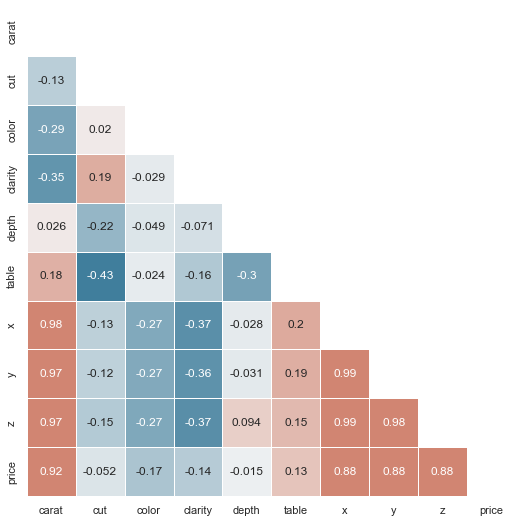

In [21]:
df_correl = df_diamonds.drop(columns='id') #all variables model

sns.set_theme(style="white")
corr = df_correl.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, cbar=False);

In [22]:
#carat, x,y,z have the highest correllation with price

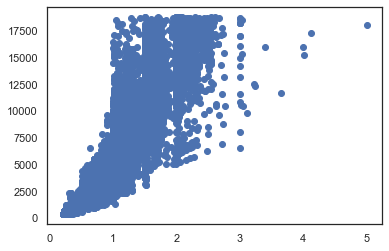

In [23]:
plt.scatter(df_diamonds.carat, df_diamonds.price)
plt.show()

In [24]:
### Feature scaling

In [25]:
scaler = StandardScaler()
min_max = MinMaxScaler()

In [26]:
df_diamonds_scaled = min_max.fit_transform(df_diamonds.drop(columns=['id','price']))
df_diamonds_scaled = pd.DataFrame(df_diamonds_scaled)
col_names = list(df_diamonds.drop(columns=['id','price']).columns)
df_diamonds_scaled.set_axis(col_names, axis=1,inplace=True)
df_diamonds_scaled.sample(3)

,carat,cut,color,clarity,depth,table,x,y,z
25888,0.037422,0.25,0.833333,1.000,0.447222,0.288462,0.441341,0.150000,0.402579
4473,0.072765,1.00,0.333333,0.250,0.538889,0.269231,0.486965,0.166038,0.469914
34045,0.203742,0.50,0.166667,0.125,0.569444,0.269231,0.628492,0.213836,0.616046


In [27]:
df_diamonds_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.00,Fair,0,1,56.3,64.0,6.58,6.54,3.69
1,1,0.83,Premium,3,2,62.3,58.0,6.01,5.97,3.73
2,2,1.00,Fair,5,1,67.0,53.0,6.19,6.13,4.13
3,3,1.00,Fair,2,1,66.5,62.0,6.19,6.10,4.09
4,4,1.20,Very Good,1,2,62.6,57.0,6.74,6.77,4.23
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.00,Premium,4,5,61.5,59.0,6.40,6.38,3.93
13481,13481,2.12,Premium,1,1,60.6,59.0,8.30,8.27,5.02
13482,13482,1.10,Ideal,4,3,60.7,57.0,6.66,6.70,4.05
13483,13483,0.34,Good,1,5,63.1,56.0,4.43,4.47,2.81


In [28]:
#### TEST DATA
df_diamonds_test.drop(columns=['id','cut','table'],axis=1,inplace=True)
df_test_scaled = min_max.fit_transform(df_diamonds_test)
df_test_scaled = pd.DataFrame(df_test_scaled)
col_names2 = list(df_diamonds_test.columns)
df_test_scaled.set_axis(col_names2, axis=1,inplace=True)
df_test_scaled.sample(3)

,carat,color,clarity,depth,x,y,z
10645,0.053488,0.500000,1.000,0.491429,0.470186,0.082513,0.093082
8074,0.076744,0.833333,0.375,0.454286,0.518084,0.089134,0.099371
4589,0.186047,0.166667,0.250,0.354286,0.643206,0.111205,0.116352


In [29]:
X = df_diamonds_scaled.drop(columns=['cut','table'])
#X = df_diamonds_scaled
y = df_diamonds.price

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32364, 7)
(32364,)
(8091, 7)
(8091,)


In [31]:
models={
    'linreg': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(max_iter=5000),
    'en': ElasticNet(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor(n_estimators=1600,bootstrap=True, max_depth=None,
                                 max_features='auto',min_samples_leaf=2,
                                 min_samples_split=10)}

In [32]:
for name,model in models.items():
    print('train: ', name)
    model.fit(X_train, y_train)

train:  linreg
train:  ridge
train:  lasso
train:  en
train:  knn
train:  grad
train:  dtr
train:  rfr


In [33]:
for name,model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
#    print('MEAN',round(y_pred.mean(),3))
    print('RMSE', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
    print('%RMSE', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_pred.mean()*100,2))
    print('R2', round(metrics.r2_score(y_test, y_pred),2))

------linreg------
RMSE 1247.65
%RMSE 31.79
R2 0.9
------ridge------
RMSE 1246.18
%RMSE 31.75
R2 0.9
------lasso------
RMSE 1247.63
%RMSE 31.79
R2 0.9
------en------
RMSE 3792.33
%RMSE 96.17
R2 0.1
------knn------
RMSE 637.94
%RMSE 16.22
R2 0.97
------grad------
RMSE 627.34
%RMSE 15.99
R2 0.98
------dtr------
RMSE 744.02
%RMSE 18.97
R2 0.97
------rfr------
RMSE 552.15
%RMSE 14.07
R2 0.98


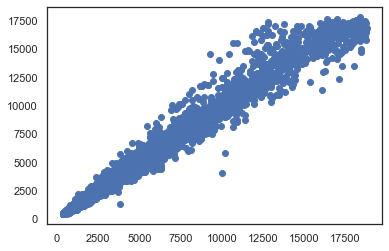

In [34]:
plt.scatter(y_test,y_pred)
plt.show()

In [35]:
### Gradient Boosting Regressor

#test = SelectKBest(score_func=chi2, k='all')
#fit = test.fit(X,y)
#features = fit.transform(X)
#model = GradientBoostingRegressor()
#rfe = RFE(model)
#fit = rfe.fit(X,y)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))

In [36]:
### DecisionTreeRegressor

#test = SelectKBest(score_func=chi2, k='all')
#fit = test.fit(X,y)
#features = fit.transform(X)
#model = DecisionTreeRegressor()
#rfe = RFE(model)
#fit = rfe.fit(X,y)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))

In [37]:
### RandomForestRegressor

test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X,y)
features = fit.transform(X)
model = RandomForestRegressor()
rfe = RFE(model)
fit = rfe.fit(X,y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False  True False False  True False]
Feature Ranking: [1 2 1 5 4 1 3]


In [38]:
list(X.columns)

['carat', 'color', 'clarity', 'depth', 'x', 'y', 'z']

In [39]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [40]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(X_train, y_train)

In [42]:
#pprint(rf_random.best_params_)

In [43]:
X = df_diamonds_scaled.drop(columns=['cut','table'])
y = df_diamonds.price
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [44]:
rfr = RandomForestRegressor(n_estimators=1600,bootstrap=True, max_depth=None,
                                 max_features='auto',min_samples_leaf=2,
                                 min_samples_split=10)

In [45]:
rfr.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1600)

In [46]:
y_pred = rfr.predict(X_test)

In [47]:
print('RMSE', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print('%RMSE', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_pred.mean()*100,2))
print('R2', round(metrics.r2_score(y_test, y_pred),2))

RMSE 549.43
%RMSE 14.06
R2 0.98


In [48]:
y_pred_train = rfr.predict(X_train)

In [49]:
print('RMSE', round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)),2))
print('%RMSE', round(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))/y_pred_train.mean()*100,2))
print('R2', round(metrics.r2_score(y_train, y_pred_train),2))

RMSE 360.64
%RMSE 9.14
R2 0.99


In [50]:
#### train with all data ####

In [51]:
rfr.fit(X,y)

RandomForestRegressor(min_samples_leaf=2, min_samples_split=10,
                      n_estimators=1600)

In [59]:
df_test_scaled.head(3)

,carat,color,clarity,depth,x,y,z
0,0.186047,0.000000,0.125,0.351429,0.643206,0.111036,0.116038
1,0.146512,0.500000,0.250,0.522857,0.587488,0.101358,0.117296
2,0.186047,0.833333,0.125,0.657143,0.605083,0.104075,0.129874


In [53]:
X.head(3)

,carat,color,clarity,depth,x,y,z
0,0.195426,0.500000,0.625,0.500000,0.627561,0.212579,0.590258
1,0.116424,0.333333,0.375,0.547222,0.545624,0.183019,0.524355
2,0.133056,0.500000,0.500,0.511111,0.562384,0.193396,0.535817


In [60]:
price = rfr.predict(df_test_scaled)

In [68]:
price = pd.DataFrame(price)
price['id'] = price.index
price.rename({0:'price'},axis='columns',inplace=True)
price = price[['id','price']]
price.head()

,id,price
0,0,3218.918347
1,1,2304.469527
2,2,3682.063152
3,3,3160.643560
4,4,5518.691808


In [69]:
price.shape

(13485, 2)

In [70]:
price.to_csv('data/price.csv',index=False)